In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Building credit risk score card
In this notebook, we will focus on analyzing credit risk customer data using Python The first step in our analysis is to load the dataset containing the credit risk customer information. We will utilize the powerful pandas library to load the data from a CSV file. Once the data is loaded, we will proceed with the data exploration phase. This involves gaining insights into the structure, format, and content of the dataset. We will examine the first few rows of data, obtain basic statistical summaries, and visualize the data using various charts and plots. By thoroughly understanding the data, we can proceed to the next steps, such as creating dummy variables and building a linear regression model and so on.

### Data Analysis

In [2]:
df = pd.read_csv('credit_customers.csv')

In [3]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [5]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
for (columnName, columnData) in df.items():
    if columnData.dtype == 'O':
        print('Name   : ', columnName)
        print('Unique : ', columnData.unique())
        print('No     : ',len(columnData.unique()))
        print()

Name   :  checking_status
Unique :  ['<0' '0<=X<200' 'no checking' '>=200']
No     :  4

Name   :  credit_history
Unique :  ['critical/other existing credit' 'existing paid' 'delayed previously'
 'no credits/all paid' 'all paid']
No     :  5

Name   :  purpose
Unique :  ['radio/tv' 'education' 'furniture/equipment' 'new car' 'used car'
 'business' 'domestic appliance' 'repairs' 'other' 'retraining']
No     :  10

Name   :  savings_status
Unique :  ['no known savings' '<100' '500<=X<1000' '>=1000' '100<=X<500']
No     :  5

Name   :  employment
Unique :  ['>=7' '1<=X<4' '4<=X<7' 'unemployed' '<1']
No     :  5

Name   :  personal_status
Unique :  ['male single' 'female div/dep/mar' 'male div/sep' 'male mar/wid']
No     :  4

Name   :  other_parties
Unique :  ['none' 'guarantor' 'co applicant']
No     :  3

Name   :  property_magnitude
Unique :  ['real estate' 'life insurance' 'no known property' 'car']
No     :  4

Name   :  other_payment_plans
Unique :  ['none' 'bank' 'stores']
No     :

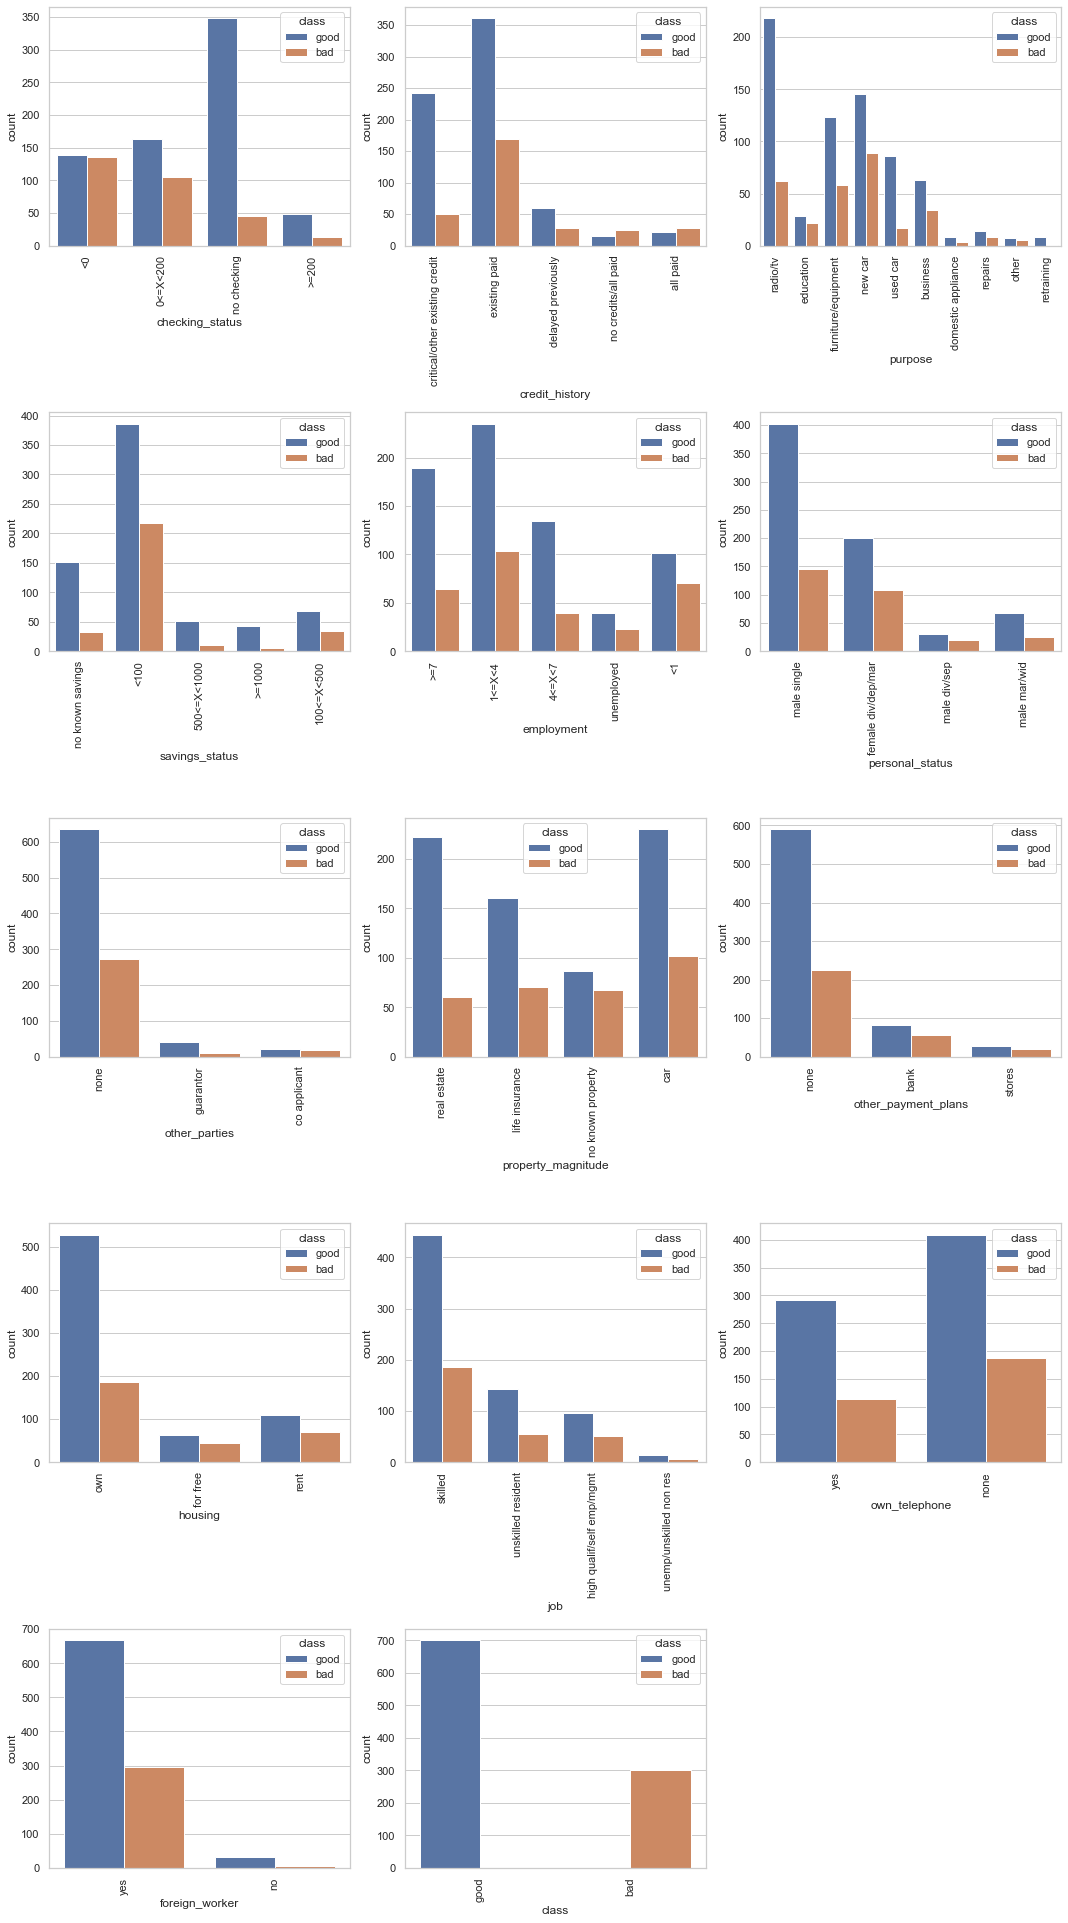

In [7]:
# visualize class dist 
sns.set_theme(style="whitegrid", palette="deep")
plt.figure(figsize = (15, 60))
category_list = df.select_dtypes(include='object').columns

x=0
for i in category_list:
    x+=1
    plt.subplot(11, 3, x)
    plt.xticks(rotation=90)
    sns.countplot(x = i, hue = 'class',  data = df)
    if x==1 or x==2:
        plt.tight_layout()

### Data Procesing
In the field of credit risk PD modeling linear regression is one of the most commonly employed techniques. It allows us to establish relationships between independent variables and a continuous target variable. However, when working with categorical variables, we need to convert them into a suitable format that can be utilized by the linear regression model. This is where dummy variables come into play. Dummy variables, also known as indicator variables, are binary representations of categorical variables. They enable us to incorporate categorical information into our regression model. In this section, we will focus on the crucial task of data preprocessing, specifically transforming the existing categorical variables into dummy variables to facilitate their integration into the linear regression model.

In [8]:
dftemp = pd.DataFrame()

In [9]:
dftemp['is_male'] = df['personal_status'].apply(lambda x: 1 if x.startswith('male') else 0)
dftemp['is_not_male'] = df['personal_status'].apply(lambda x: 1 if  x.startswith('female') else 0)

In [10]:
dftemp

,is_male,is_not_male
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
995,0,1
996,1,0
997,1,0
998,1,0


In [11]:
dftemp['is_single'] = df['personal_status'].apply(lambda x: 1 if 'single' in x else 0)
dftemp['not_single'] = df['personal_status'].apply(lambda x: 0 if 'single' in x else 1)


In [12]:
dftemp

,is_male,is_not_male,is_single,not_single
0,1,0,1,0
1,0,1,0,1
2,1,0,1,0
3,1,0,1,0
4,1,0,1,0
...,...,...,...,...
995,0,1,0,1
996,1,0,0,1
997,1,0,1,0
998,1,0,1,0


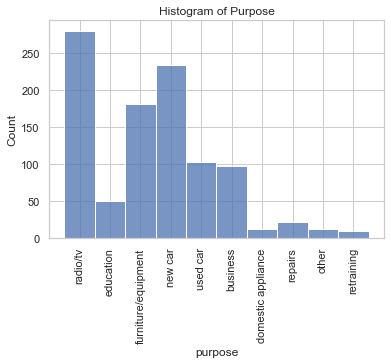

In [13]:
sns.histplot(data=df, x='purpose', bins=50)
plt.xlabel('purpose')
plt.ylabel('Count')
plt.title('Histogram of Purpose')
plt.xticks(rotation =90)
plt.show()

In [14]:
dummies = pd.get_dummies(df['purpose'], prefix_sep=':', prefix='purpose')
dftemp = pd.concat([dftemp, dummies], axis=1)

In [15]:
columns_to_combine = ['purpose:domestic appliance', 'purpose:other', 'purpose:repairs', 'purpose:retraining']

dftemp['purpose:others'] = dftemp[columns_to_combine].sum(axis=1)
dftemp.drop(columns=columns_to_combine, inplace=True)

In [16]:
value_counts = df['other_parties'].value_counts()
print(value_counts)
#I will skip this data in the model due to the dominant null value

none            907
guarantor        52
co applicant     41
Name: other_parties, dtype: int64


In [17]:
value_counts = df['other_payment_plans'].value_counts()
print(value_counts)
#I will skip this data in the model due to the dominant null value

none      814
bank      139
stores     47
Name: other_payment_plans, dtype: int64


In [18]:
value_counts = df['existing_credits'].value_counts()
print(value_counts)

1.0    633
2.0    333
3.0     28
4.0      6
Name: existing_credits, dtype: int64


In [19]:
dummies = pd.get_dummies(df['existing_credits'], prefix_sep=':', prefix='existing_credits')
dftemp = pd.concat([dftemp, dummies], axis=1)

In [20]:
dftemp

,is_male,is_not_male,is_single,not_single,purpose:business,purpose:education,purpose:furniture/equipment,purpose:new car,purpose:radio/tv,purpose:used car,purpose:others,existing_credits:1.0,existing_credits:2.0,existing_credits:3.0,existing_credits:4.0
0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
996,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
997,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
998,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0


In [21]:
columns_to_combine = ['existing_credits:3.0', 'existing_credits:4.0']

dftemp['existing_credits:3.0+'] = dftemp[columns_to_combine].sum(axis=1)
dftemp.drop(columns=columns_to_combine, inplace=True)

In [22]:
dftemp

,is_male,is_not_male,is_single,not_single,purpose:business,purpose:education,purpose:furniture/equipment,purpose:new car,purpose:radio/tv,purpose:used car,purpose:others,existing_credits:1.0,existing_credits:2.0,existing_credits:3.0+
0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
1,0,1,0,1,0,0,0,0,1,0,0,1,0,0
2,1,0,1,0,0,1,0,0,0,0,0,1,0,0
3,1,0,1,0,0,0,1,0,0,0,0,1,0,0
4,1,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,1,0,0,0,0,1,0,0
996,1,0,0,1,0,0,0,0,0,1,0,1,0,0
997,1,0,1,0,0,0,0,0,1,0,0,1,0,0
998,1,0,1,0,0,0,0,0,1,0,0,1,0,0


In [23]:
# from the earlier data analysis, I decided that the division of this data suits me and I will simply create dummy veriables
dummies = pd.get_dummies(df['credit_history'], prefix_sep=':', prefix='credit')
dftemp = pd.concat([dftemp, dummies], axis=1)
dummies = pd.get_dummies(df['savings_status'], prefix_sep=':', prefix='savings_status')
dftemp = pd.concat([dftemp, dummies], axis=1)
dummies = pd.get_dummies(df['employment'], prefix_sep=':', prefix='employment')
dftemp = pd.concat([dftemp, dummies], axis=1)
dummies = pd.get_dummies(df['installment_commitment'], prefix_sep=':', prefix='installment_commitment')
dftemp = pd.concat([dftemp, dummies], axis=1)
dummies = pd.get_dummies(df['residence_since'], prefix_sep=':', prefix='residence_since')
dftemp = pd.concat([dftemp, dummies], axis=1)
dummies = pd.get_dummies(df['property_magnitude'], prefix_sep=':', prefix='property_magnitude')
dftemp = pd.concat([dftemp, dummies], axis=1)
dummies = pd.get_dummies(df['housing'], prefix_sep=':', prefix='housing')
dftemp = pd.concat([dftemp, dummies], axis=1)
dummies = pd.get_dummies(df['job'], prefix_sep=':', prefix='job')
dftemp = pd.concat([dftemp, dummies], axis=1)
dummies = pd.get_dummies(df['num_dependents'], prefix_sep=':', prefix='num_dependents')
dftemp = pd.concat([dftemp, dummies], axis=1)
dummies = pd.get_dummies(df['own_telephone'], prefix_sep=':', prefix='own_telephone')
dftemp = pd.concat([dftemp, dummies], axis=1)
dummies = pd.get_dummies(df['foreign_worker'], prefix_sep=':', prefix='foreign_worker')
dftemp = pd.concat([dftemp, dummies], axis=1)
dummies = pd.get_dummies(df['checking_status'], prefix_sep=':', prefix='checking_status')
dftemp = pd.concat([dftemp, dummies], axis=1)

#### Continuous data
When working with  continuous data, one approach to simplify the analysis is to categorize or bin the data based on its density or distribution. By dividing the continuous data into categories or intervals, we can transform it into categorical data, allowing for easier interpretation and analysis

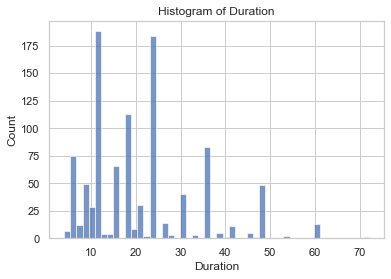

In [24]:
sns.histplot(data=df, x='duration', bins=50)
plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Histogram of Duration')
plt.show()

Z uwagi że takimi rzucajacymi sie punktami gdzie jest najwiecej kredytow czyli 12,24 zrobi sie dla nich osobna kategorie
mysle ze najlepiej bedzie zrobic podzial <12 12 miedzy 12 a 24 , 24 powyzej 24

In [25]:
dftemp['duration:<12'] = np.where((df['duration'] < 12), 1, 0)
dftemp['duration:12'] = np.where((df['duration'] == 12), 1, 0)
dftemp['duration:12-24'] = np.where((df['duration'] > 12) & (df['duration'] < 24), 1, 0)
dftemp['duration:24'] = np.where((df['duration'] == 24), 1, 0)
dftemp['duration:>24'] = np.where((df['duration'] > 24), 1, 0)




In [26]:
dftemp

,is_male,is_not_male,is_single,not_single,purpose:business,purpose:education,purpose:furniture/equipment,purpose:new car,purpose:radio/tv,purpose:used car,...,foreign_worker:yes,checking_status:0<=X<200,checking_status:<0,checking_status:>=200,checking_status:no checking,duration:<12,duration:12,duration:12-24,duration:24,duration:>24
0,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,1,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,0
996,1,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
997,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
998,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,1


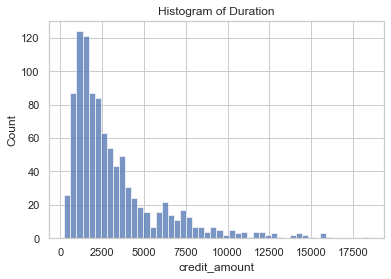

In [27]:
sns.histplot(data=df, x='credit_amount', bins=50)
plt.xlabel('credit_amount')
plt.ylabel('Count')
plt.title('Histogram of Duration')
plt.show()

In [28]:
dftemp['credit_amount:<1500'] = np.where((df['credit_amount'] < 1500), 1, 0) #306
dftemp['credit_amount:1500-2500'] = np.where((df['credit_amount'] >= 1500) & (df['credit_amount'] < 2500), 1, 0) #231
dftemp['credit_amount:2500-4000'] = np.where((df['credit_amount'] >= 2500) & (df['credit_amount'] < 4000), 1, 0) #217
dftemp['credit_amount:4000-7500'] = np.where((df['credit_amount'] >= 4000) & (df['credit_amount'] < 7500), 1, 0) #160
dftemp['credit_amount:>7500'] = np.where((df['credit_amount'] >= 7500), 1, 0) #86




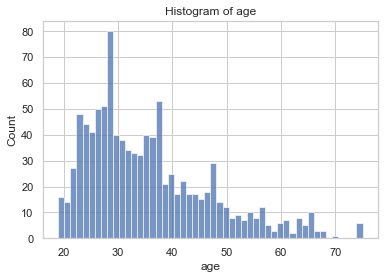

In [29]:
sns.histplot(data=df, x='age', bins=50)
plt.xlabel('age')
plt.ylabel('Count')
plt.title('Histogram of age')
plt.show()

In [30]:
#<25 25-30 30-40 40-50 50+

In [31]:
dftemp['age:<25'] = np.where((df['age'] < 25), 1, 0) 
dftemp['age:25-30'] = np.where((df['age'] >= 25) & (df['age'] < 30), 1, 0) 
dftemp['age:30-40'] = np.where((df['age'] >= 30) & (df['age'] < 40), 1, 0) 
dftemp['age:40-50'] = np.where((df['age'] >= 40) & (df['age'] < 50), 1, 0) 
dftemp['age:>50'] = np.where((df['age'] >= 50), 1, 0) 


In [32]:
dftemp

,is_male,is_not_male,is_single,not_single,purpose:business,purpose:education,purpose:furniture/equipment,purpose:new car,purpose:radio/tv,purpose:used car,...,credit_amount:<1500,credit_amount:1500-2500,credit_amount:2500-4000,credit_amount:4000-7500,credit_amount:>7500,age:<25,age:25-30,age:30-40,age:40-50,age:>50
0,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
996,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
997,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
998,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [33]:
dftemp

,is_male,is_not_male,is_single,not_single,purpose:business,purpose:education,purpose:furniture/equipment,purpose:new car,purpose:radio/tv,purpose:used car,...,credit_amount:<1500,credit_amount:1500-2500,credit_amount:2500-4000,credit_amount:4000-7500,credit_amount:>7500,age:<25,age:25-30,age:30-40,age:40-50,age:>50
0,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
996,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
997,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
998,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [34]:
value_counts = df['class'].value_counts()
print(value_counts)

good    700
bad     300
Name: class, dtype: int64


In [35]:
dftemp['good_bad'] = np.where(df['class'].isin(['bad']), 0, 1)

In [36]:
pd.set_option('display.max_columns', None)

In [37]:
dftemp

,is_male,is_not_male,is_single,not_single,purpose:business,purpose:education,purpose:furniture/equipment,purpose:new car,purpose:radio/tv,purpose:used car,purpose:others,existing_credits:1.0,existing_credits:2.0,existing_credits:3.0+,credit:all paid,credit:critical/other existing credit,credit:delayed previously,credit:existing paid,credit:no credits/all paid,savings_status:100<=X<500,savings_status:500<=X<1000,savings_status:<100,savings_status:>=1000,savings_status:no known savings,employment:1<=X<4,employment:4<=X<7,employment:<1,employment:>=7,employment:unemployed,installment_commitment:1.0,installment_commitment:2.0,installment_commitment:3.0,installment_commitment:4.0,residence_since:1.0,residence_since:2.0,residence_since:3.0,residence_since:4.0,property_magnitude:car,property_magnitude:life insurance,property_magnitude:no known property,property_magnitude:real estate,housing:for free,housing:own,housing:rent,job:high qualif/self emp/mgmt,job:skilled,job:unemp/unskilled non res,job:unskilled resident,num_dependents:1.0,num_dependents:2.0,own_telephone:none,own_telephone:yes,foreign_worker:no,foreign_worker:yes,checking_status:0<=X<200,checking_status:<0,checking_status:>=200,checking_status:no checking,duration:<12,duration:12,duration:12-24,duration:24,duration:>24,credit_amount:<1500,credit_amount:1500-2500,credit_amount:2500-4000,credit_amount:4000-7500,credit_amount:>7500,age:<25,age:25-30,age:30-40,age:40-50,age:>50,good_bad
0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
2,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
3,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
4,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
996,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
997,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
998,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0


### Model Building

The dataset is divided into training and testing sets. The training set is used to train the regression model, while the testing set is used to evaluate its performance on unseen data.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
train_test_split(dftemp.drop('good_bad', axis = 1), dftemp['good_bad'])

[     is_male  is_not_male  is_single  not_single  purpose:business  \
 547        1            0          1           0                 0   
 382        0            1          0           1                 0   
 888        1            0          1           0                 0   
 123        1            0          1           0                 0   
 378        1            0          1           0                 0   
 ..       ...          ...        ...         ...               ...   
 708        0            1          0           1                 0   
 671        1            0          1           0                 1   
 727        0            1          0           1                 0   
 334        1            0          1           0                 0   
 554        0            1          0           1                 0   
 
      purpose:education  purpose:furniture/equipment  purpose:new car  \
 547                  0                            0                0   


In [40]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(dftemp.drop('good_bad', axis = 1), dftemp['good_bad'], test_size = 0.2, random_state = 42)

In [41]:
loan_data_inputs_train.shape

(800, 73)

In [42]:
loan_data_targets_train.shape

(800,)

In [43]:
loan_data_inputs_test.shape

(200, 73)

In [44]:
loan_data_targets_test.shape

(200,)

In [45]:
dftemp.columns

Index(['is_male', 'is_not_male', 'is_single', 'not_single', 'purpose:business',
       'purpose:education', 'purpose:furniture/equipment', 'purpose:new car',
       'purpose:radio/tv', 'purpose:used car', 'purpose:others',
       'existing_credits:1.0', 'existing_credits:2.0', 'existing_credits:3.0+',
       'credit:all paid', 'credit:critical/other existing credit',
       'credit:delayed previously', 'credit:existing paid',
       'credit:no credits/all paid', 'savings_status:100<=X<500',
       'savings_status:500<=X<1000', 'savings_status:<100',
       'savings_status:>=1000', 'savings_status:no known savings',
       'employment:1<=X<4', 'employment:4<=X<7', 'employment:<1',
       'employment:>=7', 'employment:unemployed', 'installment_commitment:1.0',
       'installment_commitment:2.0', 'installment_commitment:3.0',
       'installment_commitment:4.0', 'residence_since:1.0',
       'residence_since:2.0', 'residence_since:3.0', 'residence_since:4.0',
       'property_magnitude:c

In [46]:
ref_categories = ['is_male','is_single','duration:<12','credit:all paid','purpose:business','credit_amount:<1500','savings_status:no known savings','installment_commitment:1.0','residence_since:1.0','property_magnitude:car','housing:own','existing_credits:1.0','job:skilled','num_dependents:1.0','own_telephone:none','foreign_worker:no','age:<25','checking_status:0<=X<200']

In [47]:
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train = loan_data_inputs_train.drop(ref_categories, axis = 1)
inputs_train.head()

,is_not_male,not_single,purpose:education,purpose:furniture/equipment,purpose:new car,purpose:radio/tv,purpose:used car,purpose:others,existing_credits:2.0,existing_credits:3.0+,credit:critical/other existing credit,credit:delayed previously,credit:existing paid,credit:no credits/all paid,savings_status:100<=X<500,savings_status:500<=X<1000,savings_status:<100,savings_status:>=1000,employment:1<=X<4,employment:4<=X<7,employment:<1,employment:>=7,employment:unemployed,installment_commitment:2.0,installment_commitment:3.0,installment_commitment:4.0,residence_since:2.0,residence_since:3.0,residence_since:4.0,property_magnitude:life insurance,property_magnitude:no known property,property_magnitude:real estate,housing:for free,housing:rent,job:high qualif/self emp/mgmt,job:unemp/unskilled non res,job:unskilled resident,num_dependents:2.0,own_telephone:yes,foreign_worker:yes,checking_status:<0,checking_status:>=200,checking_status:no checking,duration:12,duration:12-24,duration:24,duration:>24,credit_amount:1500-2500,credit_amount:2500-4000,credit_amount:4000-7500,credit_amount:>7500,age:25-30,age:30-40,age:40-50,age:>50
29,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
535,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0
695,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
557,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0
836,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [48]:
import sklearn.linear_model as lm
from sklearn import metrics

In [49]:
reg = lm.LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.

In [50]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LogisticRegression()

In [51]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([2.43907026])

In [52]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 0.10252784, -0.56032956, -0.67573887,  0.18633581, -0.44525283,
         0.42130429,  1.09432893,  0.17524374, -0.33742361, -0.06133935,
         1.24635146,  0.86696927,  0.4990283 , -0.33429303, -0.51879679,
        -0.21070363, -0.57180919,  0.25722321, -0.0403798 ,  0.27258909,
        -0.21195446,  0.1125543 , -0.12635894, -0.02339922, -0.33069258,
        -0.55945843, -0.69068105, -0.36748845, -0.33978046,  0.07890489,
        -0.39038501,  0.36689463, -0.18082355, -0.44581405, -0.07520235,
         0.42315185,  0.2177896 , -0.3615251 ,  0.19812861, -1.01975797,
        -0.43796854,  0.46812548,  1.09915766, -0.35976265, -0.34970998,
        -0.60709587, -0.8286577 ,  0.12894537,  0.59671261, -0.37871845,
        -0.90737156,  0.1712465 ,  0.48446367,  0.67341679,  0.55172106]])

In [53]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [54]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,2.439070
1,is_not_male,0.102528
2,not_single,-0.560330
3,purpose:education,-0.675739
4,purpose:furniture/equipment,0.186336
5,purpose:new car,-0.445253
6,purpose:radio/tv,0.421304
7,purpose:used car,1.094329
8,purpose:others,0.175244
9,existing_credits:2.0,-0.337424


In [55]:
inputs_test = loan_data_inputs_test.drop(ref_categories, axis = 1)
inputs_test.head()

,is_not_male,not_single,purpose:education,purpose:furniture/equipment,purpose:new car,purpose:radio/tv,purpose:used car,purpose:others,existing_credits:2.0,existing_credits:3.0+,credit:critical/other existing credit,credit:delayed previously,credit:existing paid,credit:no credits/all paid,savings_status:100<=X<500,savings_status:500<=X<1000,savings_status:<100,savings_status:>=1000,employment:1<=X<4,employment:4<=X<7,employment:<1,employment:>=7,employment:unemployed,installment_commitment:2.0,installment_commitment:3.0,installment_commitment:4.0,residence_since:2.0,residence_since:3.0,residence_since:4.0,property_magnitude:life insurance,property_magnitude:no known property,property_magnitude:real estate,housing:for free,housing:rent,job:high qualif/self emp/mgmt,job:unemp/unskilled non res,job:unskilled resident,num_dependents:2.0,own_telephone:yes,foreign_worker:yes,checking_status:<0,checking_status:>=200,checking_status:no checking,duration:12,duration:12-24,duration:24,duration:>24,credit_amount:1500-2500,credit_amount:2500-4000,credit_amount:4000-7500,credit_amount:>7500,age:25-30,age:30-40,age:40-50,age:>50
521,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
737,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
740,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
660,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
411,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [56]:
y_hat_test = reg.predict(inputs_test)

In [57]:
y_hat_test_proba = reg.predict_proba(inputs_test)

In [58]:
# First element is PD(Probality of Default) second is PD-1 (Probality of Not Deafult)
y_hat_test_proba[0]

array([0.32486508, 0.67513492])

In [59]:
#We are going to move with PD-1
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [60]:
loan_data_targets_test_temp = loan_data_targets_test

In [61]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [62]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)

In [63]:
df_actual_predicted_probs.shape

(200, 2)

In [64]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [65]:
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [66]:
df_actual_predicted_probs.head(5)

,loan_data_targets_test,y_hat_test_proba
521,0,0.675135
737,1,0.405138
740,1,0.476345
660,1,0.628572
411,1,0.930935


In [67]:
tr = 0.5
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [68]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,28,31
1,13,128


In [69]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.140,0.155
1,0.065,0.640


In [70]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'],
           rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.78

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

In [72]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.        , 0.        , 0.        , 0.01694915, 0.01694915,
        0.03389831, 0.03389831, 0.05084746, 0.05084746, 0.06779661,
        0.06779661, 0.08474576, 0.08474576, 0.11864407, 0.11864407,
        0.13559322, 0.13559322, 0.15254237, 0.15254237, 0.20338983,
        0.20338983, 0.22033898, 0.22033898, 0.23728814, 0.23728814,
        0.27118644, 0.27118644, 0.28813559, 0.28813559, 0.30508475,
        0.30508475, 0.3220339 , 0.3220339 , 0.33898305, 0.33898305,
        0.3559322 , 0.3559322 , 0.44067797, 0.44067797, 0.47457627,
        0.47457627, 0.49152542, 0.49152542, 0.50847458, 0.50847458,
        0.52542373, 0.52542373, 0.57627119, 0.57627119, 0.69491525,
        0.69491525, 0.72881356, 0.72881356, 0.83050847, 0.83050847,
        0.86440678, 0.86440678, 1.        ]),
 array([0.        , 0.0070922 , 0.15602837, 0.15602837, 0.39007092,
        0.39007092, 0.40425532, 0.40425532, 0.42553191, 0.42553191,
        0.43262411, 0.43262411, 0.43971631, 0.43971631, 0.4822695 ,
  

In [73]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'],
                                 df_actual_predicted_probs['y_hat_test_proba'])

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Receiver Operating Characteristic (ROC) 
The Receiver Operating Characteristic (ROC) curve is a graphical representation commonly used in binary classification tasks to evaluate the performance of a classification model. It illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) at various classification thresholds.

Text(0.5, 1.0, 'ROC curve')

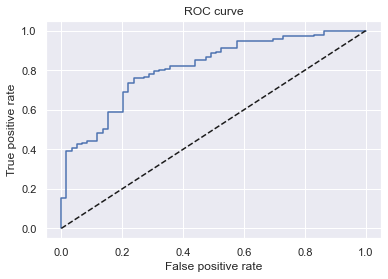

In [75]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

# Blue Line - ROC curve
# Black dotted line - Preditnig by chance 

#### AUROC
An AUROC score of 81% is generally considered good. The AUC-ROC score ranges from 0 to 1, where a score of 1 represents a perfect classifier, while a score of 0.5 indicates a random classifier. Therefore, an AUC-ROC score of 81% indicates that the model performs significantly better than random chance.

In [76]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.8117562206996033

In [77]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')

In [78]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
522,0,0.085092,0
332,0,0.102543,0
714,0,0.129148,0
59,0,0.155532,0
721,0,0.161443,0


In [79]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
767,1,0.983770,1
867,1,0.983984,1
210,1,0.985287,1
527,1,0.989560,1
209,1,0.992688,1


In [80]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [81]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,522,0,0.085092,0
1,332,0,0.102543,0
2,714,0,0.129148,0
3,59,0,0.155532,0
4,721,0,0.161443,0


In [82]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()

In [83]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,522,0,0.085092,0,1,0,1
1,332,0,0.102543,0,2,0,2
2,714,0,0.129148,0,3,0,3
3,59,0,0.155532,0,4,0,4
4,721,0,0.161443,0,5,0,5


In [84]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [85]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,522,0,0.085092,0,1,0,1,0.005,0.0,0.016949
1,332,0,0.102543,0,2,0,2,0.010,0.0,0.033898
2,714,0,0.129148,0,3,0,3,0.015,0.0,0.050847
3,59,0,0.155532,0,4,0,4,0.020,0.0,0.067797
4,721,0,0.161443,0,5,0,5,0.025,0.0,0.084746


In [86]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
195,767,1,0.983770,1,196,137,59,0.980,0.971631,1.0
196,867,1,0.983984,1,197,138,59,0.985,0.978723,1.0
197,210,1,0.985287,1,198,139,59,0.990,0.985816,1.0
198,527,1,0.989560,1,199,140,59,0.995,0.992908,1.0
199,209,1,0.992688,1,200,141,59,1.000,1.000000,1.0


### Gini coefficient
Gini coefficient is a valuable metric in credit risk modeling as it quantifies the model's ability to discriminate between borrowers with different credit risk levels. A higher Gini coefficient suggests a more accurate and effective model in predicting credit risk.

Text(0.5, 1.0, 'Gini')

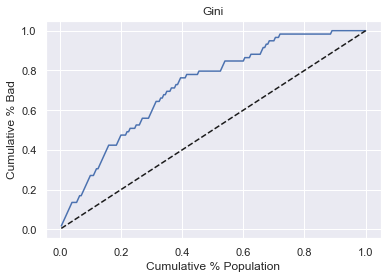

In [87]:
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [88]:
Gini = AUROC * 2 - 1
Gini

0.6235124413992066

### Kolmogorov-Smirnov coefficient
The maximum difference between the cumulative distribution functions of 'good' and 'bad' borrowers a larger difference between the cumulative distribution functions of "good" and "bad" borrowers indicates a better-performing model in credit risk analysis

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

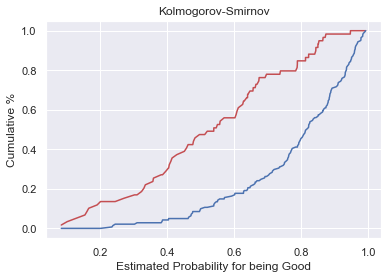

In [89]:
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [90]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.52157711263373

### Creating a Scorecard: Simplifying and Enhancing the Usability of PD Models

The process of creating a scorecard in a Probability of Default (PD) model aims to simplify and enhance the usability of the model. A PD model, which assesses the likelihood of credit default, should be easy to understand and use for both analysts and business users. A scorecard is a simple, intuitive tool that assigns points to different variables based on their impact on PD. It transforms a complex statistical model into a straightforward set of rules that can be easily interpreted.

In [91]:
summary_table

,Feature name,Coefficients
0,Intercept,2.439070
1,is_not_male,0.102528
2,not_single,-0.560330
3,purpose:education,-0.675739
4,purpose:furniture/equipment,0.186336
5,purpose:new car,-0.445253
6,purpose:radio/tv,0.421304
7,purpose:used car,1.094329
8,purpose:others,0.175244
9,existing_credits:2.0,-0.337424


In [92]:
ref_categories

['is_male',
 'is_single',
 'duration:<12',
 'credit:all paid',
 'purpose:business',
 'credit_amount:<1500',
 'savings_status:no known savings',
 'installment_commitment:1.0',
 'residence_since:1.0',
 'property_magnitude:car',
 'housing:own',
 'existing_credits:1.0',
 'job:skilled',
 'num_dependents:1.0',
 'own_telephone:none',
 'foreign_worker:no',
 'age:<25',
 'checking_status:0<=X<200']

In [93]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories

,Feature name,Coefficients
0,is_male,0
1,is_single,0
2,duration:<12,0
3,credit:all paid,0
4,purpose:business,0
5,credit_amount:<1500,0
6,savings_status:no known savings,0
7,installment_commitment:1.0,0
8,residence_since:1.0,0
9,property_magnitude:car,0


In [94]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard = df_scorecard.reset_index()
df_scorecard

,index,Feature name,Coefficients
0,0,Intercept,2.439070
1,1,is_not_male,0.102528
2,2,not_single,-0.560330
3,3,purpose:education,-0.675739
4,4,purpose:furniture/equipment,0.186336
...,...,...,...
69,13,num_dependents:1.0,0.000000
70,14,own_telephone:none,0.000000
71,15,foreign_worker:no,0.000000
72,16,age:<25,0.000000


In [95]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard['Original feature name'][1] = 'gender'
df_scorecard['Original feature name'][56] = 'gender'
df_scorecard['Original feature name'][2] = 'Marital Status'
df_scorecard['Original feature name'][57] = 'Marital Status'

C:\Users\chceg\AppData\Local\Temp/ipykernel_5504/3580542186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Original feature name'][1] = 'gender'
C:\Users\chceg\AppData\Local\Temp/ipykernel_5504/3580542186.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Original feature name'][56] = 'gender'
C:\Users\chceg\AppData\Local\Temp/ipykernel_5504/3580542186.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [96]:
df_scorecard

,index,Feature name,Coefficients,Original feature name
0,0,Intercept,2.439070,Intercept
1,1,is_not_male,0.102528,gender
2,2,not_single,-0.560330,Marital Status
3,3,purpose:education,-0.675739,purpose
4,4,purpose:furniture/equipment,0.186336,purpose
...,...,...,...,...
69,13,num_dependents:1.0,0.000000,num_dependents
70,14,own_telephone:none,0.000000,own_telephone
71,15,foreign_worker:no,0.000000,foreign_worker
72,16,age:<25,0.000000,age


In [97]:
min_score = 300
max_score = 850

In [98]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()

Original feature name
Intercept                 2.439070
Marital Status           -0.560330
age                       0.000000
checking_status          -0.437969
credit                   -0.334293
credit_amount            -0.907372
duration                 -0.828658
employment               -0.211954
existing_credits         -0.337424
foreign_worker           -1.019758
gender                    0.000000
housing                  -0.445814
installment_commitment   -0.559458
job                      -0.075202
num_dependents           -0.361525
own_telephone             0.000000
property_magnitude       -0.390385
purpose                  -0.675739
residence_since          -0.690681
savings_status           -0.571809
Name: Coefficients, dtype: float64

In [99]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
min_sum_coef

-5.969300206401342

In [100]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()

Original feature name
Intercept                 2.439070
Marital Status            0.000000
age                       0.673417
checking_status           1.099158
credit                    1.246351
credit_amount             0.596713
duration                  0.000000
employment                0.272589
existing_credits          0.000000
foreign_worker            0.000000
gender                    0.102528
housing                   0.000000
installment_commitment    0.000000
job                       0.423152
num_dependents            0.000000
own_telephone             0.198129
property_magnitude        0.366895
purpose                   1.094329
residence_since           0.000000
savings_status            0.257223
Name: Coefficients, dtype: float64

In [101]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
max_sum_coef

8.769552920770897

In [102]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation
0,0,Intercept,2.439070,Intercept,91.017166
1,1,is_not_male,0.102528,gender,3.825963
2,2,not_single,-0.560330,Marital Status,-20.909446
3,3,purpose:education,-0.675739,purpose,-25.216099
4,4,purpose:furniture/equipment,0.186336,purpose,6.953370
...,...,...,...,...,...
69,13,num_dependents:1.0,0.000000,num_dependents,0.000000
70,14,own_telephone:none,0.000000,own_telephone,0.000000
71,15,foreign_worker:no,0.000000,foreign_worker,0.000000
72,16,age:<25,0.000000,age,0.000000


In [103]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
df_scorecard

C:\Users\chceg\AppData\Local\Temp/ipykernel_5504/1263832758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,Original feature name,Score - Calculation
0,0,Intercept,2.439070,Intercept,613.769580
1,1,is_not_male,0.102528,gender,3.825963
2,2,not_single,-0.560330,Marital Status,-20.909446
3,3,purpose:education,-0.675739,purpose,-25.216099
4,4,purpose:furniture/equipment,0.186336,purpose,6.953370
...,...,...,...,...,...
69,13,num_dependents:1.0,0.000000,num_dependents,0.000000
70,14,own_telephone:none,0.000000,own_telephone,0.000000
71,15,foreign_worker:no,0.000000,foreign_worker,0.000000
72,16,age:<25,0.000000,age,0.000000


In [104]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,2.439070,Intercept,613.769580,614.0
1,1,is_not_male,0.102528,gender,3.825963,4.0
2,2,not_single,-0.560330,Marital Status,-20.909446,-21.0
3,3,purpose:education,-0.675739,purpose,-25.216099,-25.0
4,4,purpose:furniture/equipment,0.186336,purpose,6.953370,7.0
...,...,...,...,...,...,...
69,13,num_dependents:1.0,0.000000,num_dependents,0.000000,0.0
70,14,own_telephone:none,0.000000,own_telephone,0.000000,0.0
71,15,foreign_worker:no,0.000000,foreign_worker,0.000000,0.0
72,16,age:<25,0.000000,age,0.000000,0.0


In [105]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [106]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max(). sum()
max_sum_score_prel

851.0

In [107]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,2.439070,Intercept,613.769580,614.0,0.230420
1,1,is_not_male,0.102528,gender,3.825963,4.0,0.174037
2,2,not_single,-0.560330,Marital Status,-20.909446,-21.0,-0.090554
3,3,purpose:education,-0.675739,purpose,-25.216099,-25.0,0.216099
4,4,purpose:furniture/equipment,0.186336,purpose,6.953370,7.0,0.046630
...,...,...,...,...,...,...,...
69,13,num_dependents:1.0,0.000000,num_dependents,0.000000,0.0,0.000000
70,14,own_telephone:none,0.000000,own_telephone,0.000000,0.0,0.000000
71,15,foreign_worker:no,0.000000,foreign_worker,0.000000,0.0,0.000000
72,16,age:<25,0.000000,age,0.000000,0.0,0.000000


In [108]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][11] = 46

df_scorecard.head(52)

C:\Users\chceg\AppData\Local\Temp/ipykernel_5504/3814089741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][11] = 46


,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,2.439070,Intercept,613.769580,614.0,0.230420,614.0
1,1,is_not_male,0.102528,gender,3.825963,4.0,0.174037,4.0
2,2,not_single,-0.560330,Marital Status,-20.909446,-21.0,-0.090554,-21.0
3,3,purpose:education,-0.675739,purpose,-25.216099,-25.0,0.216099,-25.0
4,4,purpose:furniture/equipment,0.186336,purpose,6.953370,7.0,0.046630,7.0
5,5,purpose:new car,-0.445253,purpose,-16.615204,-17.0,-0.384796,-17.0
6,6,purpose:radio/tv,0.421304,purpose,15.721533,16.0,0.278467,16.0
7,7,purpose:used car,1.094329,purpose,40.836346,41.0,0.163654,41.0
8,8,purpose:others,0.175244,purpose,6.539454,7.0,0.460546,7.0
9,9,existing_credits:2.0,-0.337424,existing_credits,-12.591413,-13.0,-0.408587,-13.0


In [109]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel

300.0

In [110]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max(). sum()
max_sum_score_prel

850.0

In [111]:
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,2.439070,Intercept,613.769580,614.0,0.230420,614.0
1,1,is_not_male,0.102528,gender,3.825963,4.0,0.174037,4.0
2,2,not_single,-0.560330,Marital Status,-20.909446,-21.0,-0.090554,-21.0
3,3,purpose:education,-0.675739,purpose,-25.216099,-25.0,0.216099,-25.0
4,4,purpose:furniture/equipment,0.186336,purpose,6.953370,7.0,0.046630,7.0
...,...,...,...,...,...,...,...,...
69,13,num_dependents:1.0,0.000000,num_dependents,0.000000,0.0,0.000000,0.0
70,14,own_telephone:none,0.000000,own_telephone,0.000000,0.0,0.000000,0.0
71,15,foreign_worker:no,0.000000,foreign_worker,0.000000,0.0,0.000000,0.0
72,16,age:<25,0.000000,age,0.000000,0.0,0.000000,0.0


In [112]:
sort_df = df_scorecard.sort_values(by='Original feature name')


In [113]:
final_scorecard = sort_df.iloc[:,[3,1,7]]

In [114]:
pd.set_option('display.max_rows', None)

In [115]:
final_scorecard

,Original feature name,Feature name,Score - Final
0,Intercept,Intercept,614.0
57,Marital Status,is_single,0.0
2,Marital Status,not_single,-21.0
55,age,age:>50,21.0
54,age,age:40-50,25.0
53,age,age:30-40,18.0
52,age,age:25-30,6.0
72,age,age:<25,0.0
43,checking_status,checking_status:no checking,41.0
42,checking_status,checking_status:>=200,17.0
